# Solving a Regression Problem (1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures   ### 라이브러리 불러오기
from sklearn.linear_model import LinearRegression

### Data Example (one feature)

In [2]:
dat = np.loadtxt(fname = 'regData1.txt', delimiter = ',')   ### 데이터 불러오기 (40, 2)

In [3]:
n_sample = dat.shape[0]   ### 데이터 길이 추출

print(dat.shape)   ### 형태
print(n_sample)   ### 길이

(40, 2)
40


In [4]:
### 데이터셋에서 1/4은 Test Set으로, 나머지는 Tranin Set으로 나누어 준다.

np.random.seed(0)
rindex = np.random.permutation(n_sample)   ### 0~39까지랜덤 수 추출
print(rindex)

ncut = int(n_sample/4)   ### 40개의 1/4인 10개 계산  
print(ncut)

X_train = dat[rindex[: -ncut], 0].reshape(-1, 1)   ### Train, Test 분리
Y_train = dat[rindex[: -ncut], 1].reshape(-1, 1)   ### reshape()에서 -1은 나머지 숫자에 맞춰서 자동설정
X_test = dat[rindex[-ncut:], 0].reshape(-1, 1)
Y_test = dat[rindex[-ncut:], 1].reshape(-1, 1)

[22 20 25  4 10 15 28 11 18 29 27 35 37  2 39 30 34 16 36  8 13  5 17 14 33
  7 32  1 26 12 31 24  6 23 21 19  9 38  3  0]
10


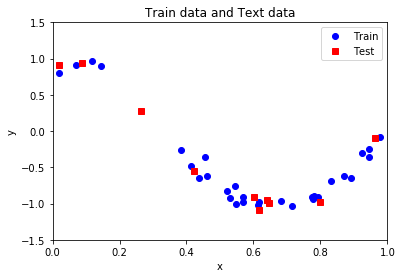

In [5]:
### 그래프 출력

plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.plot(X_train, Y_train, 'bo', label='Train')
plt.plot(X_test, Y_test, 'rs', label='Test')
plt.title('Train data and Text data')
plt.xlabel('x')
plt.ylabel('y')
_=plt.legend(loc='best')

### Linear Regression (y = ax+b)

In [6]:
linReg = LinearRegression()

In [7]:
linReg.fit(X_train, Y_train)    ### 이때 x, y 변수가 반드시 shape(-1, 1) 형태여야 함 
print(linReg.coef_)   ### 기울기 값 충전

[[-1.41535017]]


In [8]:
xm = np.mean(X_train)
ym = np.mean(Y_train)
a = linReg.coef_
b = ym-a*xm
print(a, b)   ### 모델 : y = ax+b에서 a, b값 출력

[[-1.41535017]] [[ 0.3527202]]


In [9]:
Y_pred = linReg.predict(X_train)   ### 모델에 적합한 예측값 계산
linTrainError = np.mean((Y_pred - Y_train)**2)   ### Error 계산
print(linTrainError)

0.227489566313


In [10]:
Y_pred = linReg.predict(X_test)
linTestError = np.mean((Y_pred - Y_test)**2)
print(linTestError)

0.273265172457


In [11]:
xval = np.linspace(0, 1, 101).reshape(-1,1)
yval = linReg.predict(xval).reshape(-1,1)

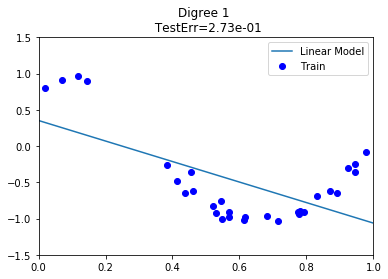

In [12]:
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.plot(xval, yval, label='Linear Model')
plt.plot(X_train, Y_train, 'bo', label='Train')
plt.legend(loc='best')
_=plt.title('Digree {} \n TestErr={:.2e}'.format(1, linTestError))

### Quadratic Regression (y = w₁x+w₂x²+b)

In [13]:
quadPoly = PolynomialFeatures(degree=2, include_bias=False)   ### 제곱항 추가
X_train_Poly2 = quadPoly.fit_transform(X_train)
X_test_Poly2 = quadPoly.fit_transform(X_test)
print(X_train_Poly2.shape, X_test_Poly2.shape)

(30, 2) (10, 2)


In [14]:
quadReg = LinearRegression()

In [15]:
quadReg.fit(X_train_Poly2, Y_train)
print(quadReg.coef_)   ### w 출력

[[-7.36889687  5.69101484]]


In [16]:
Y_pred = quadReg.predict(X_train_Poly2)
quadTrainError = np.mean((Y_pred-Y_train)**2)
print(quadTrainError)

Y_pred = quadReg.predict(X_test_Poly2)
quadTestError = np.mean((Y_pred - Y_test)**2)
print(quadTestError)

0.0319403926666
0.0470066996656


In [17]:
w = quadReg.coef_.T.copy()
Xm = np.mean(X_train_Poly2, axis=0).reshape(-1,1)
Ym = np.mean(Y_train)

w1 = w[0]
w2 = w[1]
b = Ym-w[0]*Xm[0]-w[1]*Xm[1]

print(w1, w2, b)

[-7.36889687] [ 5.69101484] [ 1.48496342]


In [18]:
xval = np.linspace(0, 1, 101).reshape(-1,1)
xval_Poly2 = quadPoly.fit_transform(xval)
yval = quadReg.predict(xval_Poly2).reshape(-1,1)

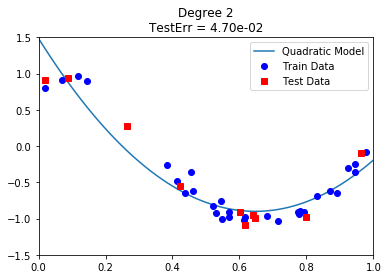

In [19]:
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.plot(xval,yval,label="Quadratic Model")
plt.plot(X_train, Y_train, 'bo', label="Train Data")
plt.plot(X_test, Y_test, 'rs', label="Test Data")
plt.legend(loc="best")
_ = plt.title("Degree {}\nTestErr = {:.2e}".format(2, quadTestError))